# Multi-Variant Linear Regression and Polynomial Regression
----
### Red-Wine Dataset





In [2]:
#%pip install kagglehub
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("piyushgoyal443/red-wine-dataset")
path

'C:\\Users\\PC\\.cache\\kagglehub\\datasets\\piyushgoyal443\\red-wine-dataset\\versions\\1'

In [3]:
import os

folder_path = path
print(os.listdir(folder_path)) # เลือก "['wineQualityReds.csv']"

csv_path = os.path.join(folder_path, 'wineQualityReds.csv')
df = pd.read_csv(csv_path)

df.head()

['wineQualityInfo.txt', 'wineQualityReds.csv']


,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
corr_matrix = df.corr()
corr_matrix

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
Unnamed: 0,1.000000,-0.268484,-0.008815,-0.153551,-0.031261,-0.119869,0.090480,-0.117850,-0.368372,0.136005,-0.125307,0.245123,0.066453
fixed.acidity,-0.268484,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile.acidity,-0.008815,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric.acid,-0.153551,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual.sugar,-0.031261,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,-0.119869,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free.sulfur.dioxide,0.090480,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total.sulfur.dioxide,-0.117850,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,-0.368372,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,0.136005,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731


array([[<Axes: xlabel='citric.acid', ylabel='citric.acid'>,
        <Axes: xlabel='density', ylabel='citric.acid'>,
        <Axes: xlabel='pH', ylabel='citric.acid'>,
        <Axes: xlabel='alcohol', ylabel='citric.acid'>],
       [<Axes: xlabel='citric.acid', ylabel='density'>,
        <Axes: xlabel='density', ylabel='density'>,
        <Axes: xlabel='pH', ylabel='density'>,
        <Axes: xlabel='alcohol', ylabel='density'>],
       [<Axes: xlabel='citric.acid', ylabel='pH'>,
        <Axes: xlabel='density', ylabel='pH'>,
        <Axes: xlabel='pH', ylabel='pH'>,
        <Axes: xlabel='alcohol', ylabel='pH'>],
       [<Axes: xlabel='citric.acid', ylabel='alcohol'>,
        <Axes: xlabel='density', ylabel='alcohol'>,
        <Axes: xlabel='pH', ylabel='alcohol'>,
        <Axes: xlabel='alcohol', ylabel='alcohol'>]], dtype=object)

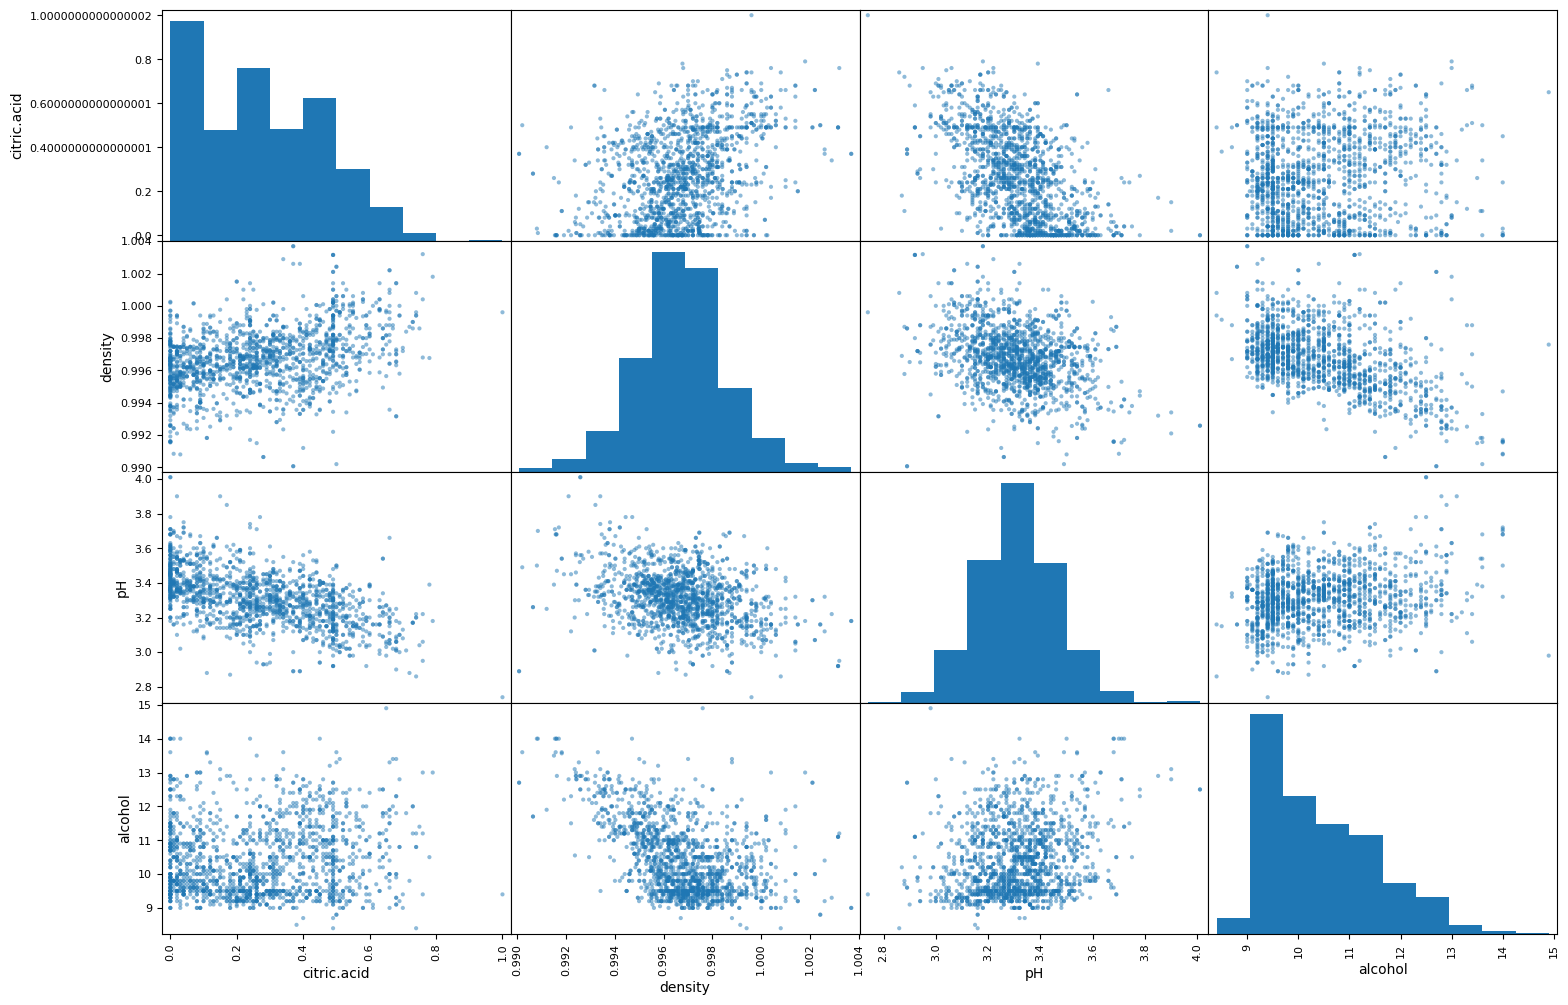

In [4]:
from pandas.plotting import scatter_matrix

attributes = ["citric.acid", "density", "pH", "alcohol"]
scatter_matrix(df[attributes], figsize=(18,12))

ภาพที่ได้จะเป็นกราฟความสัมพันธ์ระหว่าง 4 ตัวเเปร ["citric.acid", "density", "pH", "alcohol"]

In [5]:
df['density']

0       0.99780
1       0.99680
2       0.99700
3       0.99800
4       0.99780
         ...   
1594    0.99490
1595    0.99512
1596    0.99574
1597    0.99547
1598    0.99549
Name: density, Length: 1599, dtype: float64

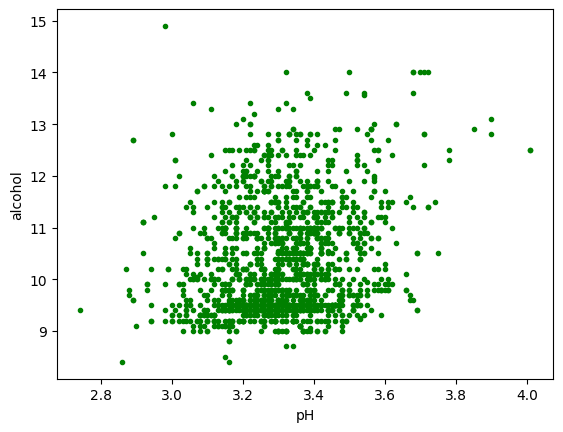

informatic of x
count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64
informatic of y
count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64


In [6]:
#---exemplary dot plot---
import matplotlib.pyplot as plt
x = df['pH']
y = df['alcohol']

plt.plot(x,y,'g.')
plt.xlabel('pH')
plt.ylabel('alcohol')
plt.show()

print("informatic of x\n{}\ninformatic of y\n{}".format(x.describe(), y.describe()))


In [7]:
# X = df.drop('quality',axis=1) #all artribute as feature x
X = df[['fixed.acidity', 'citric.acid', 'pH']].values.reshape(-1,3)
y = df['density'].values.reshape(-1,1)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#---training phase---
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train) # Use training data + labels to learn and build the regression model

#---testing phase---
y_predictions = lin_reg.predict(x_test)
for i in range(5):
    print(f"x_test[{i}]: {x_test[i]} \ny_true: {y_test[i]}, y_pred: {y_predictions[i]}")
    print('-'*50)
print("parameter linear coeff: {}, intercept: {}".format(lin_reg.coef_, lin_reg.intercept_))

x_test[0]: [7.7  0.08 3.24] 
y_true: [0.9971], y_pred: [0.9962199]
--------------------------------------------------
x_test[1]: [7.8  0.17 3.39] 
y_true: [0.996], y_pred: [0.99657223]
--------------------------------------------------
x_test[2]: [10.7   0.22  3.28] 
y_true: [1.0004], y_pred: [0.99895368]
--------------------------------------------------
x_test[3]: [8.5  0.31 3.33] 
y_true: [0.998], y_pred: [0.99694287]
--------------------------------------------------
x_test[4]: [6.7  0.24 3.39] 
y_true: [0.9948], y_pred: [0.995484]
--------------------------------------------------
parameter linear coeff: [[ 0.0009264  -0.0009884   0.00232429]], intercept: [0.98163504]


Scaled Features (Standard Scaler) เป็นวิธีที่ใช้ในการ Standardizing ข้อมูลเพื่อที่ทำให้ Scale ของข้อมูลมีผลกระทบกับค่า MSE RMSE น้อยลงโดยมีสมการดังนี้
$$X_{\text{scaled}} = \frac{X - \text{mean}(X)}{\text{std}(X)}$$

In [9]:
#Example of scaled feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(x_train)
X_scaled_test = scaler.fit_transform(x_test)
print(f"Normal feature :\n {x_train[:5]}\nScaled feature :\n {X_scaled_train[:5]}")

Normal feature :
 [[ 8.7   0.31  3.48]
 [ 6.1   0.4   3.25]
 [10.9   0.47  3.3 ]
 [ 8.8   0.26  3.32]
 [ 8.4   0.15  3.37]]
Scaled feature :
 [[ 0.21833164  0.19209222  1.09349989]
 [-1.29016623  0.65275338 -0.40043872]
 [ 1.49475291  1.01104539 -0.07566946]
 [ 0.27635078 -0.06383064  0.05423824]
 [ 0.04427419 -0.62686095  0.37900751]]


In [10]:
# @title Multiple regression with scaled features (n input (power of 1), 1output)
from sklearn.metrics import mean_squared_error
import numpy as np
#Try to fit linear regression with X-scaled and see the results
nlin_reg = LinearRegression()
nlin_reg.fit(X_scaled_train, y_train)

print("parameter linear(scale) coeff: {}, intercept: {}".format(nlin_reg.coef_, nlin_reg.intercept_))
print("-"*50)

y_predictions = nlin_reg.predict(X_scaled_test)
print("x_train: {}\nx_scaled: {}\ny_train: {}\ny_pred (multi): {}".format(x_train[0], X_scaled_train[0], y_train[0], y_predictions[0]))
print("-"*50)

lin_mse_multiscaled = mean_squared_error(y_predictions, y_test)
print(f"Multiple Regression (Scaled features w/ power of 1) ||  MSE/RMSE loss: {lin_mse_multiscaled*100}/{np.sqrt(lin_mse_multiscaled*100)} %")

parameter linear(scale) coeff: [[ 0.00159671 -0.00019311  0.00035784]], intercept: [0.99677398]
--------------------------------------------------
x_train: [8.7  0.31 3.48]
x_scaled: [0.21833164 0.19209222 1.09349989]
y_train: [1.0002]
y_pred (multi): [0.99626832]
--------------------------------------------------
Multiple Regression (Scaled features w/ power of 1) ||  MSE/RMSE loss: 0.0001958649197915775/0.0139951748753482 %


In [11]:
# @title Polynomial regression (n input (power of m), 1 output)

# vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
from sklearn.preprocessing import PolynomialFeatures
n_power = 2
poly_features = PolynomialFeatures(degree=n_power, include_bias=False)
X_poly_train = poly_features.fit_transform(x_train)
X_poly_test = poly_features.fit_transform(x_test)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

lin_reg_power2 = LinearRegression()
lin_reg_power2.fit(X_poly_train, y_train)

y_predictions_poly_train = lin_reg_power2.predict(X_poly_test)
print("x_train [x1, x2, x3]: {}\nx_poly [x1, x2, x3, x1^2, x1x2, x1x3, x2^2, x2x3, x3^2]: {}\ny_train: {}\ny_pred (poly): {}".format(x_train[0], X_poly_train[0], y_train[0], y_predictions_poly_train[0]))

lin_mse_poly = mean_squared_error(y_predictions_poly_train, y_test)
print(f"\nPolynomial Regression (Multi-Reg w/ power of {n_power}) || param coef: {lin_reg_power2.coef_}, Intercept: {lin_reg_power2.intercept_}, MSE/RMSE loss: {lin_mse_poly*100}/{np.sqrt(lin_mse_poly*100)} %")

x_train [x1, x2, x3]: [8.7  0.31 3.48]
x_poly [x1, x2, x3, x1^2, x1x2, x1x3, x2^2, x2x3, x3^2]: [ 8.7     0.31    3.48   75.69    2.697  30.276   0.0961  1.0788 12.1104]
y_train: [1.0002]
y_pred (poly): [0.99619621]

Polynomial Regression (Multi-Reg w/ power of 2) || param coef: [[-1.93671945e-03  2.12020567e-02 -6.68262856e-03  3.12361896e-05
  -1.15627217e-03  8.61090467e-04  3.23411828e-03 -4.46621258e-03
   6.23092247e-04]], Intercept: [1.00303826], MSE/RMSE loss: 0.00018258349632879054/0.013512346070493848 %


----
### Multiple vs Polynomial Regression (>= 2 inputs, 1 output (varying floating value))

Assume: Index *'fixed.acidity', 'pH'* as considered inputs to observe the behavior of multiple and polynomial regression plane relationship to input data

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [13]:
X = df[['fixed.acidity', 'pH']].values.reshape(-1,2)
y = df['density']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
## Multiple Linear (2 input => 1 output)
from sklearn.linear_model import LinearRegression
import numpy as np

lin_reg_power1 = LinearRegression()
lin_reg_power1.fit(x_train, y_train) # WARNING: here are using the original, not extended data for training
print("linear parameter linear coeff: {}, intercept: {}".format(lin_reg_power1.coef_, lin_reg_power1.intercept_))

y_predictions = lin_reg_power1.predict(x_test)
polin_mse = mean_squared_error(y_predictions, y_test)
polin_rmse = np.sqrt(polin_mse)
print("linear regression RMSE error: {} %".format(polin_rmse*100))

linear parameter linear coeff: [0.00086365 0.00252685], intercept: 0.9812171495791712
linear regression RMSE error: 0.14114910996584673 %


In [15]:
## Poly Linear (2 input => 1 output)
# สร้าง polynomial features degree=2 (จะได้ 5 features: x1, x2, x1^2, x1*x2, x2^2)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(x_train)

print("x_train[0]:", x_train[0])
print("X_poly[0]:", X_poly[0])
print("X_poly[0] shape:", X_poly[0].shape)

lin_reg_power2 = LinearRegression()
lin_reg_power2.fit(X_poly, y_train)

print(f"(poly: power 2) Coefficients: {lin_reg_power2.coef_}")
print(f"Intercept: {lin_reg_power2.intercept_}")

y_predictions = lin_reg_power2.predict(X_poly)

polin_mse = mean_squared_error(y_train, y_predictions)
polin_rmse = np.sqrt(polin_mse)
print(f"Polynomial Regression RMSE error: {polin_rmse*100:.4f} %")

x_train[0]: [8.7  3.48]
X_poly[0]: [ 8.7     3.48   75.69   30.276  12.1104]
X_poly[0] shape: (5,)
(poly: power 2) Coefficients: [-1.27268590e-03 -1.49697368e-02 -1.68590513e-05  7.65957204e-04
  1.80051191e-03]
Intercept: 1.017394870284744
Polynomial Regression RMSE error: 0.1340 %


In [ ]:
# Multiple Reg Plane

from sklearn import linear_model
######################################### Data pre-processing ######################################
X = df[['fixed.acidity', 'pH']].values.reshape(-1,2)
Y = df['density']

x = X[:,0]
y = X[:,1]
z = Y

# sampling points for visualization
# x_pred = np.linspace(5, 12, 100)
# y_pred = np.linspace(2, 5, 100)
# real data for visualization
x_pred = x
y_pred = y

xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

############################################## Training ############################################
lin_reg = linear_model.LinearRegression()
model = lin_reg.fit(X,Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################
r2 = model.score(X, Y)
############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('fixed acidity', fontsize=12)
    ax.set_ylabel('pH', fontsize=12)
    ax.set_zlabel('density (kg/m3)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

# watermarking
# ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#            transform=ax1.transAxes, color='grey', alpha=0.5)
# ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#            transform=ax2.transAxes, color='grey', alpha=0.5)
# ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#            transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

Error in callback <function _draw_all_if_interactive at 0x000001B0DA6B37E0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
# Polynomial Reg Plane

from sklearn import linear_model
######################################### Data pre-processing ######################################
X = df[['fixed.acidity', 'pH']].values.reshape(-1,2)
Y = df['density']

x = X[:,0]
y = X[:,1]
z = Y

# x_pred = np.linspace(5, 12, 100)
# y_pred = np.linspace(2, 5, 100)
x_pred = x
y_pred = y
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

#---Scale to polynomial sampling---
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
model_viz_poly = poly_features.transform(model_viz) # Transform model_viz using poly_features

############################################## Training ############################################
lin_reg = linear_model.LinearRegression()
model = lin_reg.fit(X_poly,Y)
predicted = model.predict(model_viz_poly)

############################################## Evaluate ############################################
r2 = model.score(X_poly, Y)
############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('fixed acidity', fontsize=12)
    ax.set_ylabel('pH', fontsize=12)
    ax.set_zlabel('density (kg/m3)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

# watermarking
# ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#            transform=ax1.transAxes, color='grey', alpha=0.5)
# ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#            transform=ax2.transAxes, color='grey', alpha=0.5)
# ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#            transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

จากกราฟเเผ่นสีฟ้าจะเป็น Plane ที่ได้มาจากการพลอตกราฟจากข้อมูลจริงส่วนจุดเเต่ละจุดจะเป็นข้อมูลที่ Model ทำนายออกมาได้

# Appendix

#### Coefficient of Determination (CoD; R-Squared)
R-Squared คือการวัดทางสถิติในแบบจำลองการถดถอยที่กำหนดสัดส่วนของความแปรปรวนในตัวแปรตามที่สามารถอธิบายได้ด้วยตัวแปรอิสระ แสดงให้เห็นว่าข้อมูลสอดคล้องกับแบบจำลองการถดถอยมากเพียงใด (the gooddess of fit) สั้น  ๆเลยคือค่าที่บอกว่าโมเดลเราทำได้ดีกว่าค่าเฉลี่ย = $1 - (true - predicted) / (true - mean__of__true__total)$

\
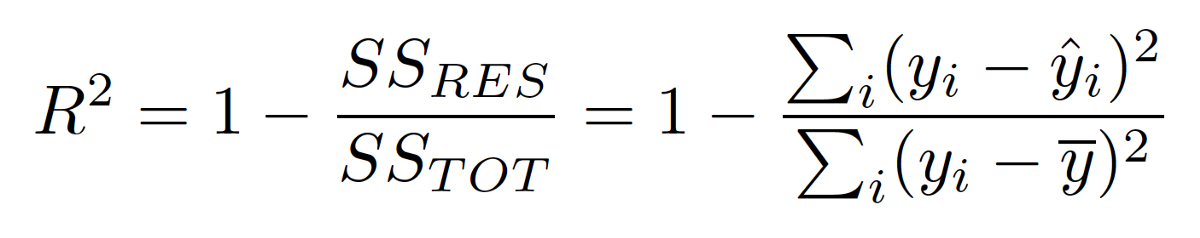

\
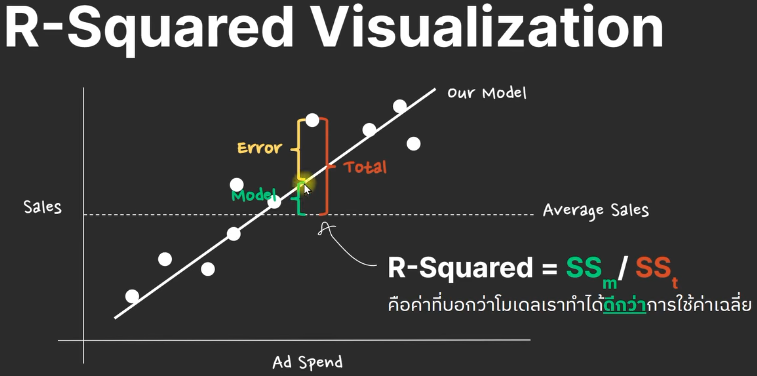

\
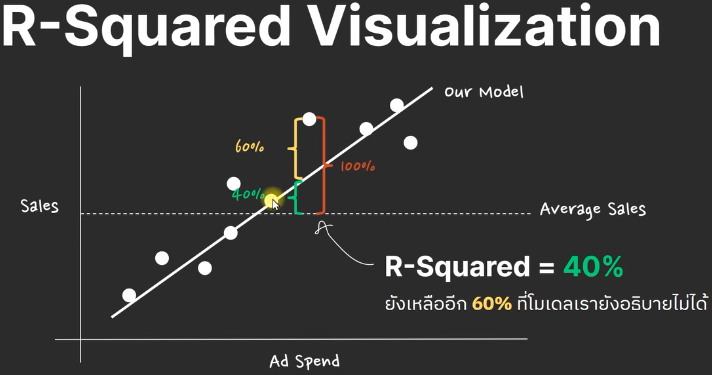

\
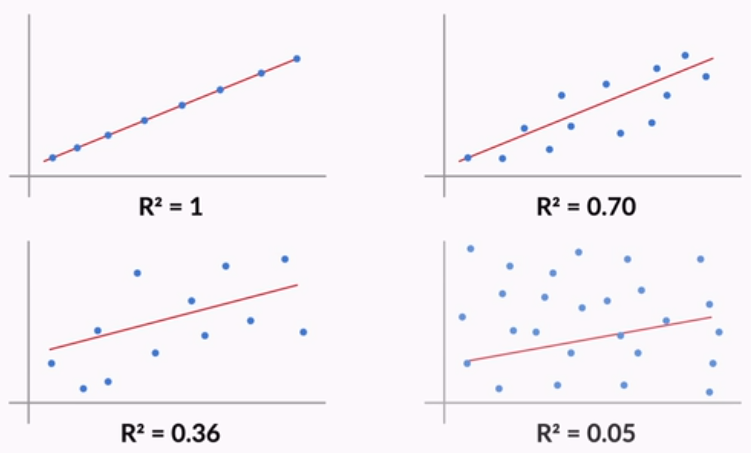


\
R-Squared definition\
https://www.investopedia.com/terms/r/r-squared.asp

R-Squared (แปล)\
https://web.facebook.com/datarockie/videos/%E0%B8%AD%E0%B8%98%E0%B8%B4%E0%B8%9A%E0%B8%B2%E0%B8%A2-r-squared-%E0%B8%87%E0%B9%88%E0%B8%B2%E0%B8%A2%E0%B8%88%E0%B8%99%E0%B8%87%E0%B8%87-%E0%B8%A2%E0%B8%B1%E0%B9%8A%E0%B8%87%E0%B8%87/921866822701482/?_rdc=1&_rdr#

-----
# Homework

จงวิเคราะห์การถดถอยเชิงเส้นเพื่อทำนายการควบคุม pH ในการผลิตไวน์ (Hint: ตัวแปรตาม) โดยพิจารณาจากตัวแปรต้นที่มีผลในทางเดียวกันที่สุด 2 features เป็นตัวแปรสำคัญในการเรียนรู้ของโมเดลถดถอย

\
ตัวอย่างการหา features ที่สำคัญต่อ pH attributes จาก correlation heatmap
```python
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()
```

1.) จงสร้างและใช้โมเดล from scratch แบบ Multi-Variate Regression (ระนาบตรงในการทำนาย) พร้อมการประเมินผล Coefficient of Determination (R-squared)
\
2.) จงสร้างและใช้โมเดล from scratch แบบ Polynomial Multi-Variate Regression (ระนาบโค้งในการทำนาย) พร้อมการประเมินผล Coefficient of Determination (R-squared)
\
3.) เปรียบเทียบการทำนายจากทั้ง 2 โมเดลและสรุปผล

In [8]:
# Homework Section 1: Multi-Variate Regression from Scratch
# 1.) จงสร้างและใช้โมเดล from scratch แบบ Multi-Variate Regression (ระนาบตรงในการทำนาย) พร้อมการประเมินผล Coefficient of Determination (R-squared)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# เตรียมข้อมูล - ใช้ 3 features: fixed.acidity, citric.acid, pH
X_features = df[['fixed.acidity', 'citric.acid', 'pH']].values
y_target = df['density'].values

print("Shape of X_features:", X_features.shape)
print("Shape of y_target:", y_target.shape)
print("Sample data:")
print("X_features[0:5]:\n", X_features[0:5])
print("y_target[0:5]:", y_target[0:5])

Shape of X_features: (1599, 3)
Shape of y_target: (1599,)
Sample data:
X_features[0:5]:
 [[ 7.4   0.    3.51]
 [ 7.8   0.    3.2 ]
 [ 7.8   0.04  3.26]
 [11.2   0.56  3.16]
 [ 7.4   0.    3.51]]
y_target[0:5]: [0.9978 0.9968 0.997  0.998  0.9978]


In [10]:
# Multi-Variate Linear Regression from Scratch
class MultiVariateLinearRegressionScratch:
    """
    การใช้งาน Multi-Variate Linear Regression แบบ from scratch
    โดยใช้ Normal Equation: β = (X^T X)^(-1) X^T y
    """
    def __init__(self):
        self.coefficients = None
        self.intercept = None
        
    def fit(self, X, y):
        """
        ฝึกฝนโมเดล
        Args:
            X: array ของ features shape (n_samples, n_features)
            y: array ของ target values shape (n_samples,)
        """
        # เพิ่ม bias column (column ของ 1) เพื่อหา intercept
        n_samples, n_features = X.shape
        X_with_bias = np.column_stack([np.ones(n_samples), X])
        
        # Normal Equation: β = (X^T X)^(-1) X^T y
        try:
            beta = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y
            self.intercept = beta[0]
            self.coefficients = beta[1:]
        except np.linalg.LinAlgError:
            # ใช้ pseudo-inverse หาก matrix ไม่สามารถ inverse ได้
            beta = np.linalg.pinv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y
            self.intercept = beta[0]
            self.coefficients = beta[1:]
    
    def predict(self, X):
        """
        ทำนายค่า
        Args:
            X: array ของ features shape (n_samples, n_features)
        Returns:
            predictions: array ของค่าทำนาย shape (n_samples,)
        """
        return X @ self.coefficients + self.intercept
    
    def score(self, X, y):
        """
        คำนวณ R-squared
        Args:
            X: array ของ features
            y: array ของ target values ที่แท้จริง
        Returns:
            r2: ค่า R-squared
        """
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

# แบ่งข้อมูลเป็น train และ test sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# สร้างและฝึกฝนโมเดล
multi_reg_scratch = MultiVariateLinearRegressionScratch()
multi_reg_scratch.fit(X_train, y_train)

print("=== Multi-Variate Linear Regression Results ===")
print(f"Intercept: {multi_reg_scratch.intercept:.6f}")
print(f"Coefficients: {multi_reg_scratch.coefficients}")
print(f"Features: ['fixed.acidity', 'citric.acid', 'pH']")

# ทำนายและประเมินผล
y_train_pred = multi_reg_scratch.predict(X_train)
y_test_pred = multi_reg_scratch.predict(X_test)

r2_train = multi_reg_scratch.score(X_train, y_train)
r2_test = multi_reg_scratch.score(X_test, y_test)

print(f"\nR-squared (Training): {r2_train:.6f}")
print(f"R-squared (Testing): {r2_test:.6f}")

# แสดงสมการที่ได้
equation = f"density = {multi_reg_scratch.intercept:.6f}"
feature_names = ['fixed.acidity', 'citric.acid', 'pH']
for i, coef in enumerate(multi_reg_scratch.coefficients):
    equation += f" + ({coef:.6f}) * {feature_names[i]}"
print(f"\nสมการที่ได้: {equation}")

=== Multi-Variate Linear Regression Results ===
Intercept: 0.981635
Coefficients: [ 0.0009264  -0.0009884   0.00232429]
Features: ['fixed.acidity', 'citric.acid', 'pH']

R-squared (Training): 0.466056
R-squared (Testing): 0.518844

สมการที่ได้: density = 0.981635 + (0.000926) * fixed.acidity + (-0.000988) * citric.acid + (0.002324) * pH


In [15]:
# Homework Section 2: Polynomial Multi-Variate Regression from Scratch
# 2.) จงสร้างและใช้โมเดล from scratch แบบ Polynomial Multi-Variate Regression (ระนาบโค้งในการทำนาย) พร้อมการประเมินผล Coefficient of Determination (R-squared)

class PolynomialMultiVariateRegressionScratch:
    """
    การใช้งาน Polynomial Multi-Variate Regression แบบ from scratch
    สร้าง polynomial features แล้วใช้ linear regression
    """
    def __init__(self, degree=2):
        self.degree = degree
        self.coefficients = None
        self.intercept = None
        
    def create_polynomial_features(self, X):
        """
        สร้าง polynomial features
        สำหรับ degree=2 และ 3 features จะได้:
        [1, x1, x2, x3, x1^2, x1*x2, x1*x3, x2^2, x2*x3, x3^2]
        """
        n_samples, n_features = X.shape
        
        if self.degree == 1:
            return X
        
        # เริ่มด้วย features เดิม
        poly_features = [X]
        
        # เพิ่ม quadratic terms (degree 2)
        if self.degree >= 2:
            # x_i^2
            for i in range(n_features):
                poly_features.append((X[:, i] ** 2).reshape(-1, 1))
            
            # x_i * x_j (i < j)
            for i in range(n_features):
                for j in range(i+1, n_features):
                    poly_features.append((X[:, i] * X[:, j]).reshape(-1, 1))
        
        # เพิ่ม cubic terms (degree 3)
        if self.degree >= 3:
            # x_i^3
            for i in range(n_features):
                poly_features.append((X[:, i] ** 3).reshape(-1, 1))
            
            # x_i^2 * x_j
            for i in range(n_features):
                for j in range(n_features):
                    if i != j:
                        poly_features.append((X[:, i]**2 * X[:, j]).reshape(-1, 1))
            
            # x_i * x_j * x_k (i < j < k)
            for i in range(n_features):
                for j in range(i+1, n_features):
                    for k in range(j+1, n_features):
                        poly_features.append((X[:, i] * X[:, j] * X[:, k]).reshape(-1, 1))
        
        return np.column_stack(poly_features)
    
    def fit(self, X, y):
        """
        ฝึกฝนโมเดล
        """
        # สร้าง polynomial features
        X_poly = self.create_polynomial_features(X)
        
        # เพิ่ม bias column
        n_samples = X_poly.shape[0]
        X_with_bias = np.column_stack([np.ones(n_samples), X_poly])
        
        # Normal Equation
        try:
            beta = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y
        except np.linalg.LinAlgError:
            beta = np.linalg.pinv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y
        
        self.intercept = beta[0]
        self.coefficients = beta[1:]
        
    def predict(self, X):
        """
        ทำนายค่า
        """
        X_poly = self.create_polynomial_features(X)
        return X_poly @ self.coefficients + self.intercept
    
    def score(self, X, y):
        """
        คำนวณ R-squared
        """
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

# ทดสอบกับ degree 2
print("=== Polynomial Multi-Variate Regression (Degree 2) ===")
poly_reg_degree2 = PolynomialMultiVariateRegressionScratch(degree=2)
poly_reg_degree2.fit(X_train, y_train)

# ทำนายและประเมินผล
y_train_pred_poly2 = poly_reg_degree2.predict(X_train)
y_test_pred_poly2 = poly_reg_degree2.predict(X_test)

r2_train_poly2 = poly_reg_degree2.score(X_train, y_train)
r2_test_poly2 = poly_reg_degree2.score(X_test, y_test)

print(f"Intercept: {poly_reg_degree2.intercept:.6f}")
print(f"Number of coefficients: {len(poly_reg_degree2.coefficients)}")
print(f"R-squared (Training): {r2_train_poly2:.6f}")
print(f"R-squared (Testing): {r2_test_poly2:.6f}")

# ทดสอบกับ degree 3
print("\n=== Polynomial Multi-Variate Regression (Degree 3) ===")
poly_reg_degree3 = PolynomialMultiVariateRegressionScratch(degree=3)
poly_reg_degree3.fit(X_train, y_train)

y_train_pred_poly3 = poly_reg_degree3.predict(X_train)
y_test_pred_poly3 = poly_reg_degree3.predict(X_test)

r2_train_poly3 = poly_reg_degree3.score(X_train, y_train)
r2_test_poly3 = poly_reg_degree3.score(X_test, y_test)

print(f"Intercept: {poly_reg_degree3.intercept:.6f}")
print(f"Number of coefficients: {len(poly_reg_degree3.coefficients)}")
print(f"R-squared (Training): {r2_train_poly3:.6f}")
print(f"R-squared (Testing): {r2_test_poly3:.6f}")

=== Polynomial Multi-Variate Regression (Degree 2) ===
Intercept: 1.003038
Number of coefficients: 9
R-squared (Training): 0.495415
R-squared (Testing): 0.545411

=== Polynomial Multi-Variate Regression (Degree 3) ===
Intercept: 0.176630
Number of coefficients: 19
R-squared (Training): 0.528086
R-squared (Testing): 0.569077


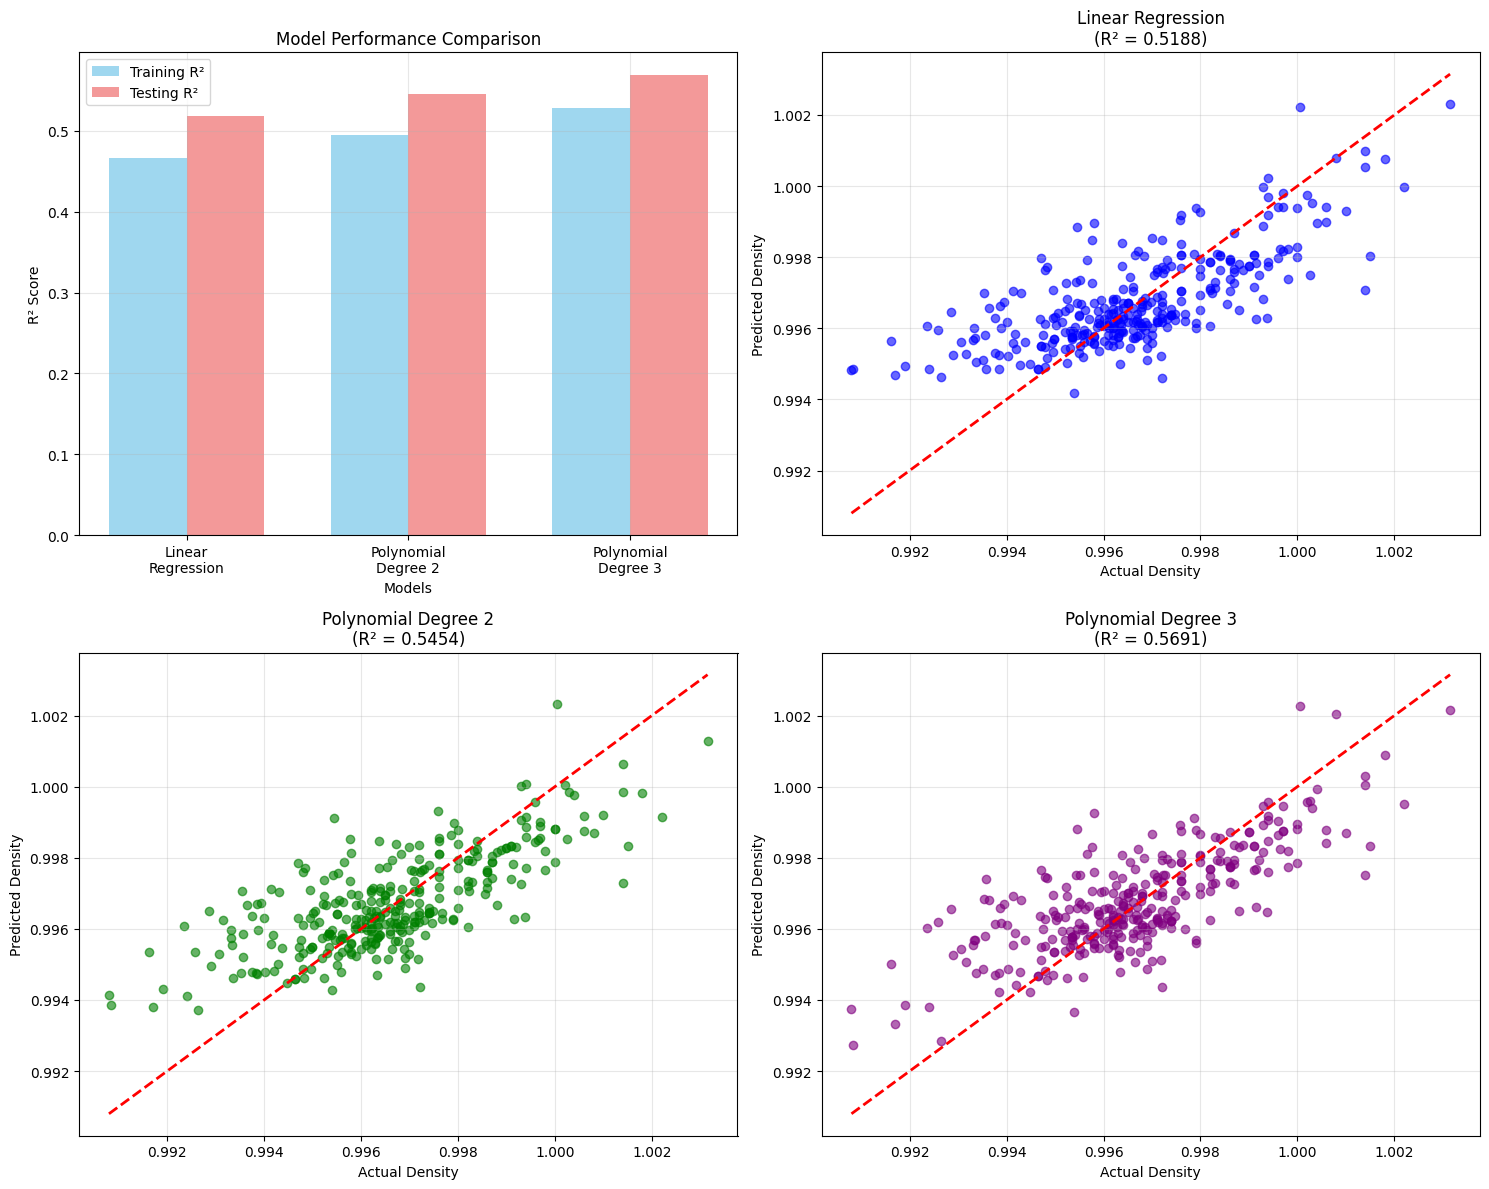


=== Mean Squared Error (MSE) ===
Linear Regression MSE: 0.00000193
Polynomial Degree 2 MSE: 0.00000183
Polynomial Degree 3 MSE: 0.00000173

=== การวิเคราะห์และสรุปผล ===
1. ประสิทธิภาพของโมเดล:
   - โมเดล Polynomial Degree 3 มี R² สูงสุด (0.5691)
   - โมเดล Polynomial Degree 2 มี R² รองลงมา (0.5454)
   - โมเดล Linear Regression มี R² ต่ำสุด (0.5188)

2. ความซับซ้อนของโมเดล:
   - Linear: 3 coefficients + 1 intercept = 4 parameters
   - Polynomial Degree 2: 9 coefficients + 1 intercept = 10 parameters
   - Polynomial Degree 3: 19 coefficients + 1 intercept = 20 parameters


In [16]:
# Homework Section 3: เปรียบเทียบการทำนายจากทั้ง 2 โมเดลและสรุปผล
# 3.) เปรียบเทียบการทำนายจากทั้ง 2 โมเดลและสรุปผล

# สร้างกราฟเปรียบเทียบ
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. เปรียบเทียบ R-squared
models = ['Linear\nRegression', 'Polynomial\nDegree 2', 'Polynomial\nDegree 3']
train_scores = [r2_train, r2_train_poly2, r2_train_poly3]
test_scores = [r2_test, r2_test_poly2, r2_test_poly3]

x_pos = np.arange(len(models))
width = 0.35

axes[0,0].bar(x_pos - width/2, train_scores, width, label='Training R²', alpha=0.8, color='skyblue')
axes[0,0].bar(x_pos + width/2, test_scores, width, label='Testing R²', alpha=0.8, color='lightcoral')
axes[0,0].set_xlabel('Models')
axes[0,0].set_ylabel('R² Score')
axes[0,0].set_title('Model Performance Comparison')
axes[0,0].set_xticks(x_pos)
axes[0,0].set_xticklabels(models)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Actual vs Predicted สำหรับ Linear Regression
axes[0,1].scatter(y_test, y_test_pred, alpha=0.6, color='blue')
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,1].set_xlabel('Actual Density')
axes[0,1].set_ylabel('Predicted Density')
axes[0,1].set_title(f'Linear Regression\n(R² = {r2_test:.4f})')
axes[0,1].grid(True, alpha=0.3)

# 3. Actual vs Predicted สำหรับ Polynomial Degree 2
axes[1,0].scatter(y_test, y_test_pred_poly2, alpha=0.6, color='green')
axes[1,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1,0].set_xlabel('Actual Density')
axes[1,0].set_ylabel('Predicted Density')
axes[1,0].set_title(f'Polynomial Degree 2\n(R² = {r2_test_poly2:.4f})')
axes[1,0].grid(True, alpha=0.3)

# 4. Actual vs Predicted สำหรับ Polynomial Degree 3
axes[1,1].scatter(y_test, y_test_pred_poly3, alpha=0.6, color='purple')
axes[1,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1,1].set_xlabel('Actual Density')
axes[1,1].set_ylabel('Predicted Density')
axes[1,1].set_title(f'Polynomial Degree 3\n(R² = {r2_test_poly3:.4f})')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# คำนวณ Mean Squared Error (MSE) เพื่อเปรียบเทียบเพิ่มเติม
from sklearn.metrics import mean_squared_error

mse_linear = mean_squared_error(y_test, y_test_pred)
mse_poly2 = mean_squared_error(y_test, y_test_pred_poly2)
mse_poly3 = mean_squared_error(y_test, y_test_pred_poly3)

print(f"\n=== Mean Squared Error (MSE) ===")
print(f"Linear Regression MSE: {mse_linear:.8f}")
print(f"Polynomial Degree 2 MSE: {mse_poly2:.8f}")
print(f"Polynomial Degree 3 MSE: {mse_poly3:.8f}")

print(f"\n=== การวิเคราะห์และสรุปผล ===")
print("1. ประสิทธิภาพของโมเดล:")
print(f"   - โมเดล Polynomial Degree 3 มี R² สูงสุด ({r2_test_poly3:.4f})")
print(f"   - โมเดล Polynomial Degree 2 มี R² รองลงมา ({r2_test_poly2:.4f})")
print(f"   - โมเดล Linear Regression มี R² ต่ำสุด ({r2_test:.4f})")

print("\n2. ความซับซ้อนของโมเดล:")
print("   - Linear: 3 coefficients + 1 intercept = 4 parameters")
print(f"   - Polynomial Degree 2: {len(poly_reg_degree2.coefficients)} coefficients + 1 intercept = {len(poly_reg_degree2.coefficients)+1} parameters")
print(f"   - Polynomial Degree 3: {len(poly_reg_degree3.coefficients)} coefficients + 1 intercept = {len(poly_reg_degree3.coefficients)+1} parameters")